# CREEDS
## Introduction
CREEDS stands for Clustered Replica Exchange Enveloping Distribution Sampling. It is a way to analyze large sets of compounds by clustering them and preparing them for REEDS simulations. The code is inspired by Hi-Map, which Mary Pitman et al. developed for pairwise free energy calculations. CREEDS expands this idea by incorporating utilities and clustering algorithms. Those functionalities are beneficial for REEDS simulations. This Jupyter Notebook intends to explain the main functions and mechanisms of CREEDS. Note that the codebase of CREEDS still needs to be improved. We want to expand, clean up and document this project further. This Jupyter Notebook might cover only some aspects of CREEDS.
## Installing CREEDS
We provide an `environment.yml` file to create a dedicated Python environment for CREEDS conveniently. Ensure to install Mamba. The correct installation of Mamba can be verified by typing the following into a terminal:

``` bash
mamba --version
```

If you see no error, Mamba is installed. Otherwise, you might need to install Mamba. Please refer to the [official installation documentation](https://mamba.readthedocs.io/en/latest/installation/mamba-installation.html). 

Afterwards, you can install the dedicated CREEDS environment by navigating to the code repository and entering:

``` bash
mamba env create -n creeds --file environment.yml
mamba activate creeds
```

Now, you should be able to run and use creeds. 
## Preparing Ligands
We currently support primarily Structures Data Files (SDFiles). Enter those into the input folder as a separate folder (for your convenience). If they are grouped into a single SDF file, we provide you with a `split_sdf.py` script to dissect each molecule out of the file. You can use it the following way:

``` bash
python creeds/split_sdf.py input/<your-sdf-file-to-be-split> -n 1
```

Now, you should have each compound in a separate file. *Make sure to delete the original file so it is not clustered*.

## Clustering the ligands
It is most convenient to modify the main function of each Python module. This approach is not the end product but has worked well for the beta tests. Open the `cluster_maker.py` file in your favourite IDE. Scroll down to the following code segment:

```python
if __name__ == "__main__":
```

There are already some examples used to generate some clusters. The results of these clusters have been reported in Luca Conconi's bachelor's thesis. First, create a ClusterMaker object. The first input should denote where the ligands are located. The second specifies if a precalculated matrix should be loaded (we will discuss how to save a distance matrix later). If this entry is True, we should disclose the location of the distance. Note that this file should be a numpy binary file. Next, we can choose the method. Only the MCSS ((Maximum Common Substructure Score) equivalent to the DBSCAN score) has been tested. The other method, the RDKit Shape method, is not recommended but has already been implemented. The variable output\_file defines where the clusters should be stored. CREEDS outputs a JSON file with the names of the ligands in each cluster as an array. As the calculation of those pairwise scores can be computationally expensive, we can parallelize the computation by specifying how many cores we want to use using the variable parallel_. Finally, select the location where plots should be stored. Those plots can be used later for further reference and analysis. Note that CREEDS supports all inputs of the db_mol Class from LoMap. These inputs can help you further adjust CREEDS to suit your needs. An example is given below:

```python
cmaker = ClusterMaker('/localhome/lconconi/CREEDS/creeds/output/FFS_cluster04_c/sdf_files/',
                       loadMatrix_=False,
                       loadFile_="/localhome/lconconi/CREEDS/creeds/output/FFS_cluster04_c_mst_noise/distance_matrix.npy",
                       method_="MCSS",
                       output_file_="/localhome/lconconi/CREEDS/creeds/output/FFS_cluster04_c_mst_noise/cluster04_c_mst_noise.json",
                       parallel_=6,
                       plot_folder_='/localhome/lconconi/CREEDS/creeds/output/FFS_cluster04_c_mst_noise/plots/')
```

After creating the object, it will automatically calculate the distance matrix and store it internally. We can save the distance matrix in the following manner:
```python
cmaker.saveDistanceMatrix("/localhome/lconconi/CREEDS/creeds/output/FFS_cluster04_c_mst_noise/distance_matrix.npy")
```

Next, we can save the ids of the ligands by the following function call:
```python
cmaker.saveDistanceMatrix("/localhome/lconconi/CREEDS/creeds/output/FFS_cluster04_c_mst_noise/distance_matrix.npy")
```

The ID list will be needed in the randomizer and visualization module.

Finally, we can create the clusters with the following function:

```python
cmaker.create_clsuters(algorithm="dbscan")
```

The algorithm may be "dbscan" or "spectral", referring to the two possible clustering algorithms currently implemented in CREEDS. Note that spectral needs a predefined number of clusters set at the beginning.
## Interactive Tutorial for CREEDS
### DBSCAN

Calculating Similarity Matrix by using Maximum Common Substructure...

Finished calculation of Similarity Matrix.


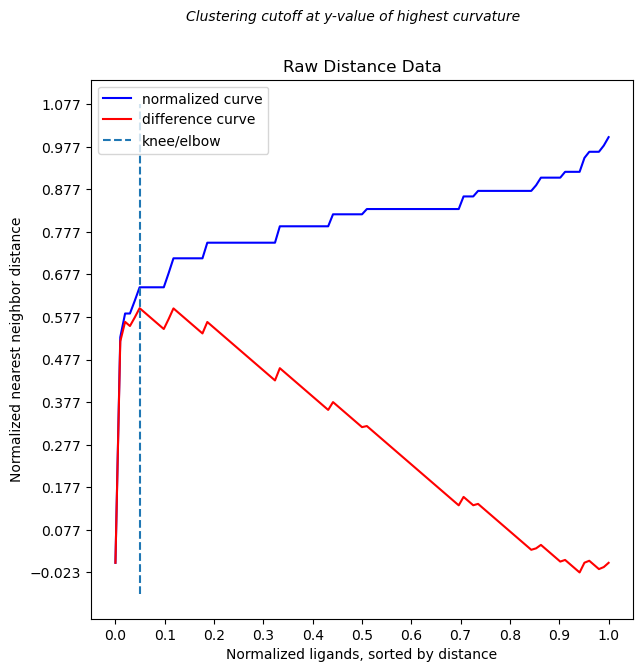

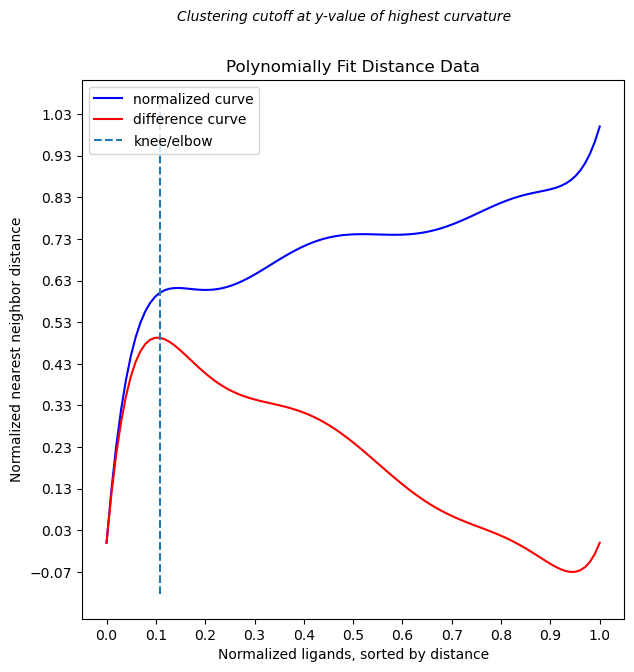

A suggested range for neighbor distances is between 0.362 and 0.33.
The computed, default cutoff is 0.33.
auto_cutoff was determined to be  0.33
Estimated number of clusters: 10
Estimated number of noise points: 27
losing %d ligands 27
The number of ligands is 103


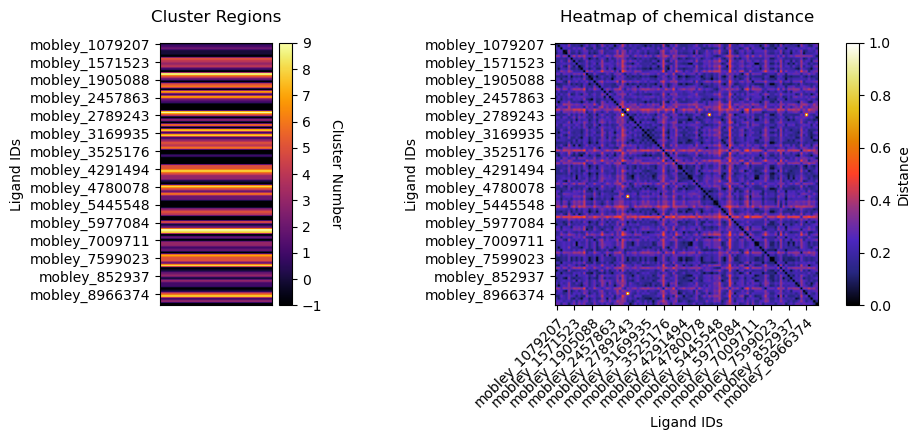

The number of ligands is 103
Wrote Clustering to  /localhome/lconconi/CREEDS/creeds/output/test_dbscan/test_dbscan_clusters.json  as json.


{'Cluster_0': ['mobley_1079207',
  'mobley_1363784',
  'mobley_1424265',
  'mobley_4584540',
  'mobley_6257907',
  'mobley_8057732',
  'mobley_8691603',
  'mobley_8861672'],
 'Cluster_1': ['mobley_1178614',
  'mobley_1760914',
  'mobley_2371092',
  'mobley_2489709',
  'mobley_3169935',
  'mobley_3187514',
  'mobley_4035953',
  'mobley_7200804',
  'mobley_8746821',
  'mobley_8789465',
  'mobley_9478823'],
 'Cluster_2': ['mobley_1189457',
  'mobley_1905088',
  'mobley_2484519',
  'mobley_4884177',
  'mobley_5220185',
  'mobley_5311804',
  'mobley_6303022',
  'mobley_6988468',
  'mobley_7295828',
  'mobley_7774695',
  'mobley_8127829'],
 'Cluster_3': ['mobley_1733799',
  'mobley_2925352',
  'mobley_3234716',
  'mobley_4494568',
  'mobley_4553008',
  'mobley_5518547',
  'mobley_7066554',
  'mobley_7150646',
  'mobley_852937',
  'mobley_8723116',
  'mobley_9507933'],
 'Cluster_4': ['mobley_1571523',
  'mobley_1755375',
  'mobley_3452749',
  'mobley_5571660'],
 'Cluster_5': ['mobley_1520842'

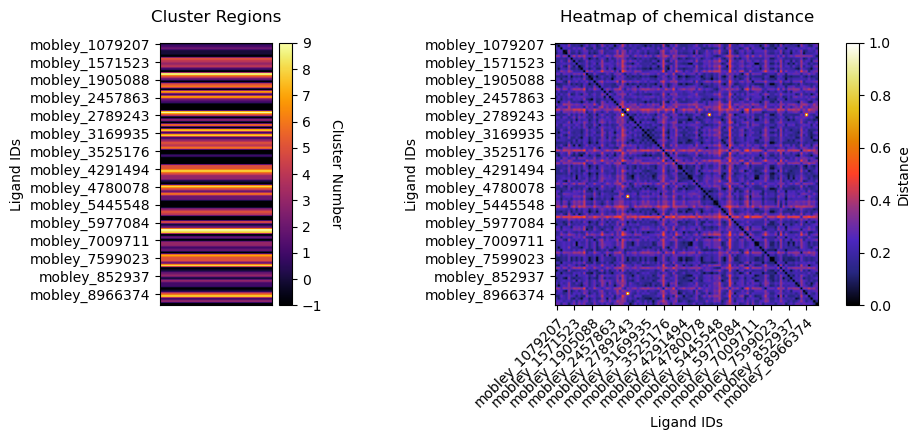

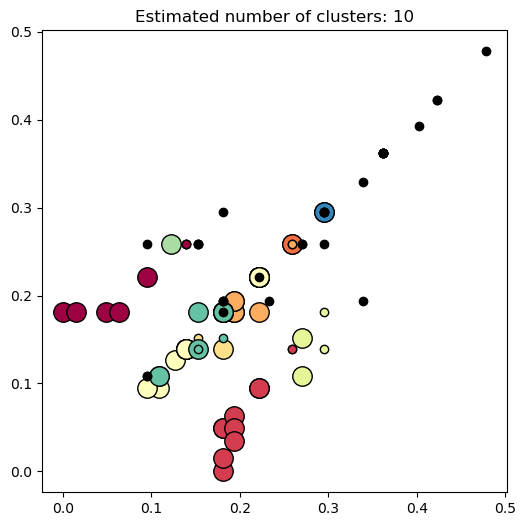

In [1]:
from cluster_maker import ClusterMaker

#creating the Cmaker object
cmaker = ClusterMaker('/localhome/lconconi/CREEDS/creeds/output/FFS_cluster04_c/sdf_files/',
                           loadMatrix_ = False,
                           loadFile_ = "/localhome/lconconi/CREEDS/creeds/output/test_dbscan/distance_matrix.npy",
                           method_ = "MCSS",
                           output_file_ = "/localhome/lconconi/CREEDS/creeds/output/test_dbscan/test_dbscan_clusters.json",
                           parallel_= 6,
                           plot_folder_ = '/localhome/lconconi/CREEDS/creeds/output/test_dbscan/plots/')
# Saving the distance Matrix
cmaker.saveDistanceMatrix("/localhome/lconconi/CREEDS/creeds/output/test_dbscan/distance_matrix.npy")
# Saving the ID List of the ligands
cmaker.writeIdList("/localhome/lconconi/CREEDS/creeds/output/test_dbscan/test_dbscan_ids.json")

cmaker.create_clusters(algorithm="dbscan", interactive=True)

### Spectral

Calculating Similarity Matrix by using Maximum Common Substructure...

Finished calculation of Similarity Matrix.
Total dispersion of first spectral clustering: 3.4612912151996813
Total dispersion of final spectral clustering: 3.4612912151996813
The number of ligands is 103


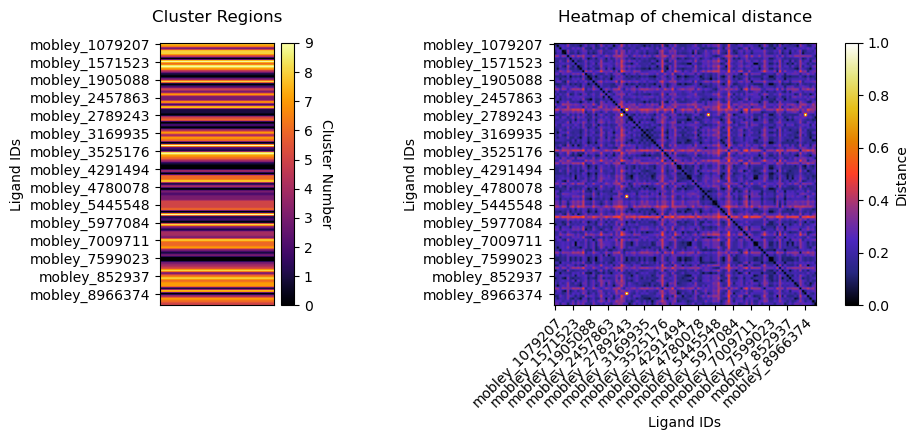

The number of ligands is 103
Wrote Clustering to  /localhome/lconconi/CREEDS/creeds/output/test_spectral/test_output.json  as json.


{'Cluster_0': ['mobley_1520842',
  'mobley_1873346',
  'mobley_20524',
  'mobley_2789243',
  'mobley_296847',
  'mobley_3053621',
  'mobley_3398536',
  'mobley_4287564',
  'mobley_4291494',
  'mobley_4483973',
  'mobley_4883284',
  'mobley_5520946',
  'mobley_5977084',
  'mobley_7599023',
  'mobley_7608462',
  'mobley_8966374'],
 'Cluster_1': ['mobley_1858644',
  'mobley_2693089',
  'mobley_2763835',
  'mobley_3525176',
  'mobley_4252724',
  'mobley_4683624',
  'mobley_588781',
  'mobley_6430250',
  'mobley_7463799',
  'mobley_8809190'],
 'Cluster_2': ['mobley_2126135',
  'mobley_2613240',
  'mobley_3040612',
  'mobley_3515580',
  'mobley_5072416',
  'mobley_5917842'],
 'Cluster_3': ['mobley_1189457',
  'mobley_1905088',
  'mobley_2354112',
  'mobley_2457863',
  'mobley_2484519',
  'mobley_4884177',
  'mobley_5220185',
  'mobley_5311804',
  'mobley_6303022',
  'mobley_6988468',
  'mobley_7295828',
  'mobley_755351',
  'mobley_7774695',
  'mobley_8127829'],
 'Cluster_4': ['mobley_185533

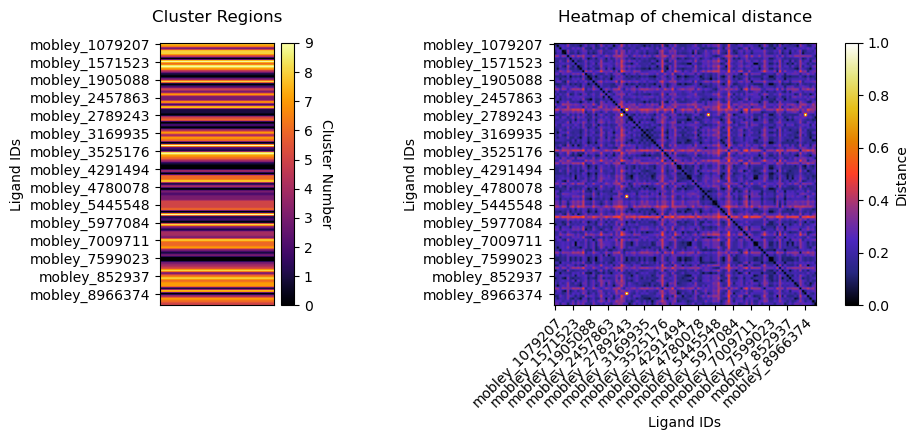

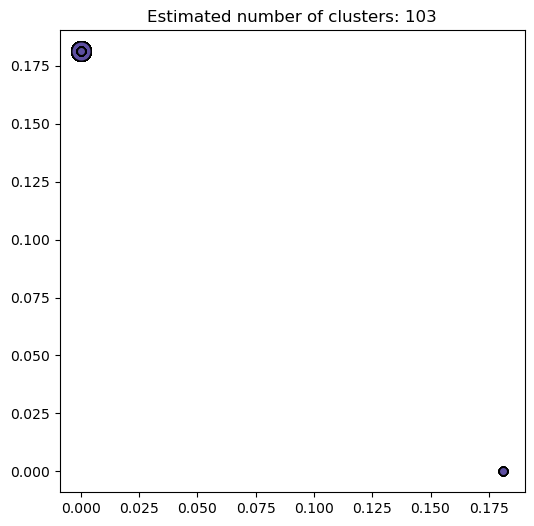

In [2]:
cmaker = ClusterMaker('/localhome/lconconi/CREEDS/creeds/output/FFS_cluster04_c/sdf_files/',
                           loadMatrix_=False,
                           loadFile_="/localhome/lconconi/CREEDS/creeds/output/test_spectral/distance_matrix.npy",
                           method_="MCSS",
                           output_file_="/localhome/lconconi/CREEDS/creeds/output/test_spectral/test_output.json",
                           parallel_=6,
                           plot_folder_='/localhome/lconconi/CREEDS/creeds/output/test_spectral/plots/')

cmaker.saveDistanceMatrix("/localhome/lconconi/CREEDS/creeds/output/test_spectral/distance_matrix.npy")
cmaker.writeIdList("/localhome/lconconi/CREEDS/creeds/output/test_spectral/test_spectral_id_list.json")
cmaker.create_clusters(algorithm="spectral", interactive=True, num_clusters=10)

## Preparing Simulations

### Unclustered Simulation
Now, we want to prepare the clusters into SDF files that can be used to run REEDS simulations. For that purpose, we developed the randomizer module, which can either take a basic set of ligands and do a randomized selection or a cluster-based mechanism. 
For a fully randomized set, use the following code:

``` python
randomize(
    output_dir = '/localhome/lconconi/CREEDS/creeds/output/test_dbscan/unclustered/',
    sdf_files = '/localhome/lconconi/CREEDS/input/p38/',
    cluster_map_file = '/localhome/lconconi/CREEDS/creeds/output/p38/unclustered/ligand_list.json',
    cluster_name = "Cluster_0",
    max_num_Ligands = 30,
    max_num_Simulations= 4,
    returnSVG = True
)
```

The output directory variable determines where the SDF files should be stored, and the sdf_files take in what ligands should be randomized and bundled. The cluster_map_file and cluster_name determine if a subset of some cluster should be taken. To take a subset of a cluster is a legacy feature and will be deleted in a future update. It was meant to create an unclustered version of FFS 04. See the thesis for a detailed description. Next, max_num_Ligands and max_num_Simulations determine how many simulations and ligands per simulation should be included. Lastly, return SVG allows you to have some SVG representation of the clusters.

### Clustered Simulation

If we want to prepare simulations based on some predetermined clustering. Use the following function:

```python
randomize_cluster_based(
    cluster_map = '/localhome/lconconi/CREEDS/creeds/output/FFS_cluster04_c_mst_noise/cluster04_c_mst_noise.json',        
    sdf_files = '/localhome/lconconi/CREEDS/creeds/output/FFS_cluster04_c/sdf_files/',
    output_dir = '/localhome/lconconi/CREEDS/creeds/output/FFS_cluster04_c_mst_noise/',
    simpleOverlap = False,
    distanceMatrix = '/localhome/lconconi/CREEDS/creeds/output/FFS_cluster04_c_mst_noise/FFS_cluster04.npy',
    ID_file= '/localhome/lconconi/CREEDS/creeds/output/FFS_cluster04_c_mst_noise/cluster04_c_mst_noise_ids.json',
    fix_ligand_num = False,
    fix_simulation_num = False,
    numLigands_per_sim= 20
    )
``` 

where cluster_map takes in the generated cluster file, which stores the association between clusters and ligands, the sdf_files determine where those files should be taken. The output_dir denotes where the simulation should be stored. Next, simpleOverlap is a flag that tells CREEDS whether to use a ring or MST overlap approach. For the MST overlap, one needs the distance matrix and the ID file, which were generated in the previous step. The last parameters are used to determine the size of the clusters.
## Interactive Simulation Preparation

### Unclustered

In [3]:
from randomizer import *
randomize(
    output_dir = '/localhome/lconconi/CREEDS/creeds/output/test_dbscan/unclustered/',
    sdf_files = '/localhome/lconconi/CREEDS/input/p38/',
    cluster_map_file = '/localhome/lconconi/CREEDS/creeds/output/p38/unclustered/ligand_list.json',
    cluster_name = "Cluster_0",
    max_num_Ligands = 30,
    max_num_Simulations= 4,
    returnSVG = True
)

### Clustered

In [4]:
randomize_cluster_based(
    cluster_map = '/localhome/lconconi/CREEDS/creeds/output/test_dbscan/test_dbscan_clusters.json',        
    sdf_files = '/localhome/lconconi/CREEDS/creeds/output/FFS_cluster04_c/sdf_files/',
    output_dir = '/localhome/lconconi/CREEDS/creeds/output/test_dbscan/clustered/',
    simpleOverlap = False,
    distanceMatrix = '/localhome/lconconi/CREEDS/creeds/output/test_dbscan/distance_matrix.npy',
    ID_file= '/localhome/lconconi/CREEDS/creeds/output/test_dbscan/test_dbscan_ids.json',
    fix_ligand_num = False,
    fix_simulation_num = False,
    numLigands_per_sim= 20
    )

loading distance Matrix
loading IDs
additional cost  5.2644846850435165
parent array  [6 7 5 9 9 8 9 9 9 9]
edge_count  9
coresponding ligands  {('Cluster_0', 'Cluster_1'): ('mobley_1079207', 'mobley_2371092'), ('Cluster_0', 'Cluster_2'): ('mobley_1079207', 'mobley_5220185'), ('Cluster_0', 'Cluster_3'): ('mobley_1079207', 'mobley_9507933'), ('Cluster_0', 'Cluster_4'): ('mobley_1079207', 'mobley_1755375'), ('Cluster_0', 'Cluster_5'): ('mobley_1079207', 'mobley_8966374'), ('Cluster_0', 'Cluster_6'): ('mobley_1363784', 'mobley_3515580'), ('Cluster_0', 'Cluster_7'): ('mobley_1363784', 'mobley_2457863'), ('Cluster_0', 'Cluster_8'): ('mobley_1363784', 'mobley_7814642'), ('Cluster_0', 'Cluster_9'): ('mobley_1363784', 'mobley_2763835'), ('Cluster_1', 'Cluster_0'): ('mobley_1178614', 'mobley_1363784'), ('Cluster_1', 'Cluster_2'): ('mobley_1178614', 'mobley_5220185'), ('Cluster_1', 'Cluster_3'): ('mobley_1178614', 'mobley_9507933'), ('Cluster_1', 'Cluster_4'): ('mobley_1178614', 'mobley_3452749'